Nama : Adhitya Saputra
Nim  : 2109106102
Posttest7

link dataset : https://www.kaggle.com/datasets/faldoae/padangfood/data

Import Library

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

Melakukan Augmentasi Gambar

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 0.45,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 0.2,
    zoom_range = 0.25,
    horizontal_flip = True,
    fill_mode = 'nearest',
)

# Normalisasi data val dan test
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

Split dataset menjadi train,val dan test Ini akan membuat directory untuk train, val, dan test nya

In [7]:
import shutil
from sklearn.model_selection import train_test_split

# Path ke direktori utama yang berisi semua folder kelas
dataset_dir = 'dataset_padang_food'

# Proporsi pembagian dataset
train_ratio = 0.7  # Proporsi data pelatihan
val_ratio = 0.15  # Proporsi data validasi
test_ratio = 0.15  # Proporsi data pengujian

# Nama-nama folder kelas
class_names = [
'ayam_goreng',
 'ayam_pop',
 'daging_rendang',
 'dendeng_batokok',
 'gulai_ikan',
 'gulai_tambusu',
 'gulai_tunjang',
 'telur_balado',
 'telur_dadar'
]

# Membagi data untuk setiap kelas
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    
    filenames = os.listdir(class_dir)
    
    train_files, test_val_files = train_test_split(filenames, test_size=(val_ratio + test_ratio), random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)
    
    # Membuat direktori untuk setiap subset
    train_dir = os.path.join(dataset_dir, 'train', class_name)
    val_dir = os.path.join(dataset_dir, 'val', class_name)
    test_dir = os.path.join(dataset_dir, 'test', class_name)
    
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Menyalin gambar ke direktori subset yang sesuai
    for filename in train_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)
    
    for filename in val_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)
    
    for filename in test_files:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)

Membuat Flow from Directory

In [8]:
# Direktori untuk setiap subset
train_dir = 'dataset_padang_food\\test'
val_dir = 'dataset_padang_food\\val'
test_dir = 'dataset_padang_food\\test'

# Membuat generator data untuk setiap subset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 153 images belonging to 9 classes.
Found 149 images belonging to 9 classes.
Found 153 images belonging to 9 classes.


sequential model

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Membuat model Sequential
model = Sequential()

# CNN (Feature Extraction Layer)
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tambahkan layer Flatten
model.add(Flatten())

# DNN (Fully Connected Layer)
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))

# Compile model
model.compile(
    optimizer = 'Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Melatih model dengan data menggunakan model.fit()
history = model.fit(train_generator, validation_data=val_generator, epochs=10, verbose=1)

Epoch 1/10
5/5 [==============================] - 16s 3s/step - loss: 2.2389 - accuracy: 0.0915 - val_loss: 2.1923 - val_accuracy: 0.1208
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 2.1956 - accuracy: 0.1242 - val_loss: 2.1816 - val_accuracy: 0.1141
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 2.1853 - accuracy: 0.1307 - val_loss: 2.1659 - val_accuracy: 0.2617
Epoch 4/10
5/5 [==============================] - 13s 2s/step - loss: 2.1578 - accuracy: 0.1961 - val_loss: 2.0986 - val_accuracy: 0.2215
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 2.0810 - accuracy: 0.2222 - val_loss: 1.9817 - val_accuracy: 0.2215
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 2.0136 - accuracy: 0.2418 - val_loss: 1.9027 - val_accuracy: 0.2685
Epoch 7/10
5/5 [==============================] - 12s 2s/step - loss: 1.9159 - accuracy: 0.2614 - val_loss: 1.8373 - val_accuracy: 0.3289
Epoch 8/10
5/5 [==================

Evaluasi model

In [13]:
# Evaluasi model terhadap data pengujian
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Loss on test data: {test_loss}')
print(f'Accuracy on test data: {test_accuracy}')

5/5 [==============================] - 2s 447ms/step - loss: 1.5769 - accuracy: 0.4510
Loss on test data: 1.5768932104110718
Accuracy on test data: 0.45098039507865906


Grafik metrik (akurasi/error) dan loss terhadap epoch

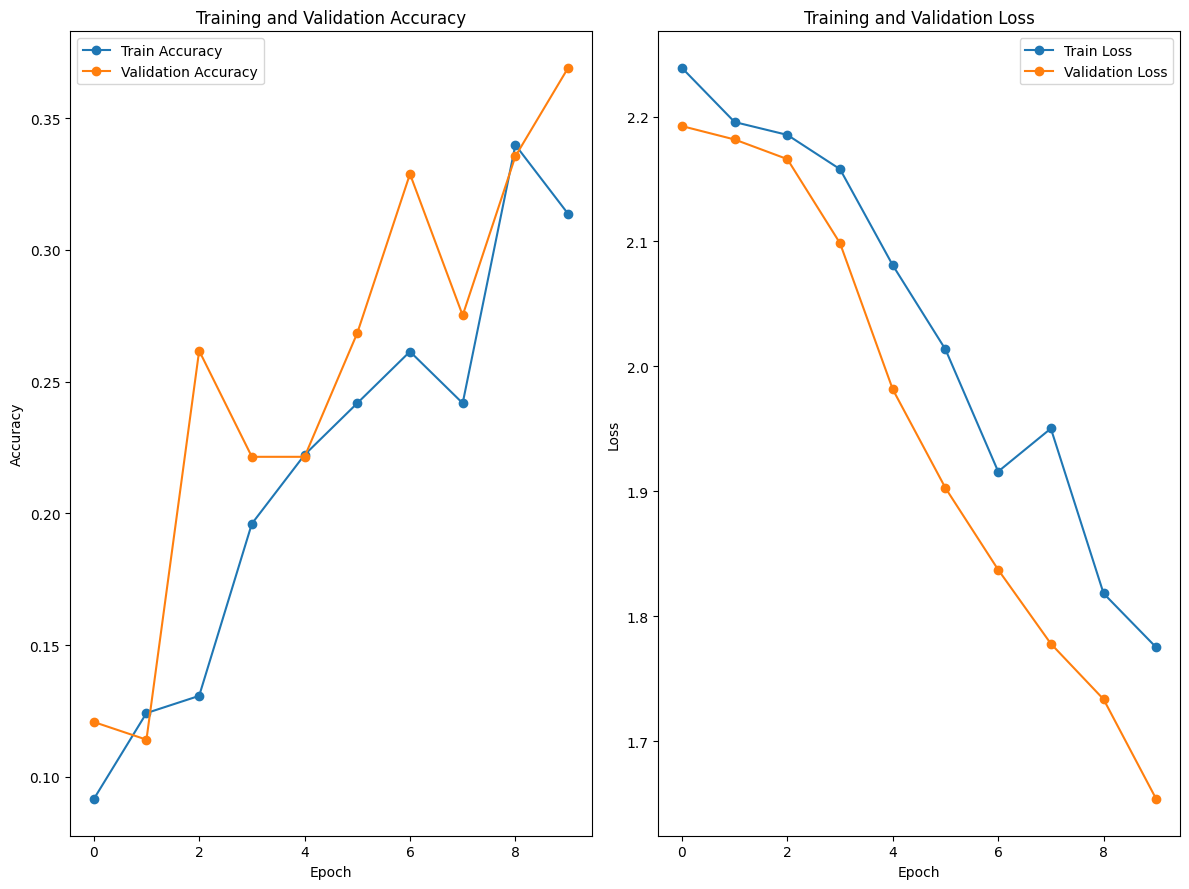

In [14]:
import matplotlib.pyplot as plt

# Dapatkan metrik dari history pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot metrik akurasi
plt.figure(figsize=(12, 9))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot metrik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()